In [1]:
import pandas as pd
import numpy as np
import helper_functions as hf
import _task1 as _task1
from ydata_quality import DataQuality
import time
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#%matplotlib inline

In [2]:
# Driver method
def init_task3():
    integrationAndaggregationFunc()
    sampleCleaningIdentifyingStrategies()

In [3]:
def integrationAndaggregationFunc():
    ### READ IN THE 3 DATA SETS ###
    # dataset containing some information on atuoscout240-data/manufacture from the files
    dataset = _task1.preProcessingOfData()
    # dataset containing information on returned orders
    #returns = pd.read_excel('autoscout24-germany-dataset-merged.csv')
    # dataset containing information on the managers for each region in the orders dataset
    brands =  hf.readManufacturers()
    datasetDfObj = pd.DataFrame(brands, columns=[ 'mark','country','year'])
    datasetDfObj=datasetDfObj.astype({'mark': 'string', 'country': 'string', 'year':'int64'})

    ###  Merge the datasets together ###

    ###  Merge the datasets together ###
    print('--------------------MERGING DATA-------------------------')

    # merged_df = (dataset.merge(brands, how='left', on=['mark', 'country']))
    merged_df=pd.merge(dataset, brands, how="right", on=["mark"])
    merged_df.to_csv('autoscout24-germany-dataset-merged.csv', index=False)

    print('Merged data output to data/output_data/merged_data.csv')
    print('---------------------------------------------------------')

    ### FILTERING EXAMPLES ###
    print('----------FILTERING EXAMPLE 1: NOT RETURNED--------------')

    #not_returned_df = merged_df.loc[merged_df['country'].isna(), :]
    not_returned_df=merged_df.dropna()

    #not_returned_df.to_csv('autoscout24-germany-dataset-merged-filtered.csv', index=False)

    print('Result output to autoscout24-germany-dataset-merged-filtered.csv')
    print('---------------------------------------------------------')



    ### AGGREGATION?GROUPBY EXAMPLES ###

    print('----------AGGREGATION EXAMPLE 1: MEAN()-----------------')

    agg_example_1 = not_returned_df.groupby(by='country')['price'].mean()

    print(agg_example_1)

    print('---------------------------------------------------------')


    print('------------AGGREGATION EXAMPLE 2: AGG()-----------------')

    agg_example_2 = not_returned_df.groupby(by='country').agg({'mileage':'mean','year_x':'median'})

    print(agg_example_2)

    print('---------------------------------------------------------')
    
   

In [4]:
 
# Mostrimi, pastrimi, identifikimi dhe strategjia e trajtimit për vlerat e zbrazëta
def sampleCleaningIdentifyingStrategies():
    filteredDataset =  hf.readMergedDataset()
    # generating one row 
    sample1 = filteredDataset.sample(n = 5)  
    # display
    print(sample1)

    # generating another row
    sample2 = filteredDataset.sample(frac =.25)
    # display
    print(sample2)

    print('Checking if sample is 0.25 times data or not')
    if (0.25*(len(filteredDataset))== len(sample2)):
        print( "Checked, sample is 0.25 times data!")
        print(len(filteredDataset), len(sample2))

    # Chose how many index include for random selection
    chosen_idx = np.random.choice(4, replace = True, size = 6)
    print(filteredDataset.iloc[chosen_idx])    
    hf.missing_cols(filteredDataset)

    print('\n Decsibe filter dataset for price')
    filteredDataset['price'].describe()

    print('\n In this histogram, you can see that most of the data is around 0 to 5000')
    plt.figure(figsize=(10, 6))
    filteredDataset['price'].hist(bins=100)

    print('\n As you can see, the price column has multiple data points that are outliers (above of the maximum in the boxplot)')
    plt.figure(figsize=(10, 6))
    filteredDataset.boxplot(column=['price'])
    plt.figure(figsize=(10, 6))
    filteredDataset['mark'].value_counts().plot.bar()
    print(filteredDataset.isnull())
    filteredDataset1 = filteredDataset[filteredDataset.isna().any(axis=1)]
    print(filteredDataset1)

    print('\n Clean up filtered dataset, deleted null values')
    filteredDataset=filteredDataset.dropna()
    hf.missing_cols(filteredDataset)



    
    
  

In [5]:
#clean data inside dataFrame, and treate data
def cleanCarDataSet():
    data = hf.readDataset()
    # fill missing data
    print("Treating missing values")
    data["model"].fillna('Unknown', inplace=True)
    data["gear"].fillna('Unknown', inplace=True)
    data["hp"].fillna('0', inplace=True)

    #drop rows that are duplicates
    print("Duplicate Rows :")
    print(data.duplicated())
    print(data.duplicated().sum())
    print("Removing duplicates....")
    data.drop_duplicates(inplace=True)
    print(data.duplicated().sum())
    print("Duplicates removed successfully!")

    print("Dataset column type definition in process...\n")
    # defining column types: mileage,make,model,fuel,gear,offerType,price,hp,year
    data['mileage'] = data['mileage'].astype(float)
    data['make'] = data['make'].astype("string")
    data['model'] = data['model'].astype("string")
    data['fuel'] = data['fuel'].astype("string")
    data['gear'] = data['gear'].astype("string")
    data['offerType'] = data['model'].astype("string")
    data['price'] = data['mileage'].astype(float)
    data['hp'] = data['mileage'].astype(int)
    data['year'] = data['fuel'].astype("string")

    # fill missing data and transforming data addin , at thousand seperator
    #data['millage'] = f'{data['millage']:,}'

    print("Dataset has successfully gone into the proccess of cleaning.\n")

    return data

cleanCarDataSet()

data = hf.readDataset()
#We check if we have both unkonwn values in make and model, because they'd be useless for us
sameMakeAndModel = data['make'] == data['model']
print(sameMakeAndModel)
sameMakeAndModel[sameMakeAndModel.astype(str).str.contains('True') ]

Treating missing values
Duplicate Rows :
0        False
1        False
2        False
3        False
4        False
         ...  
46400     True
46401     True
46402     True
46403     True
46404     True
Length: 46405, dtype: bool
2140
Removing duplicates....
0
Duplicates removed successfully!
Dataset column type definition in process...

Dataset has successfully gone into the proccess of cleaning.

0        False
1        False
2        False
3        False
4        False
         ...  
46400    False
46401    False
46402    False
46403    False
46404    False
Length: 46405, dtype: bool


Series([], dtype: bool)

=> Take a look at the first few rows
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


=> Header tbl:  mileage(analysed before), make,   model,  fuel,  gear, offerType,  price,   hp,  year
0    False
1    False
2    False
3    False
4    False
Name: make, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name: model, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name:

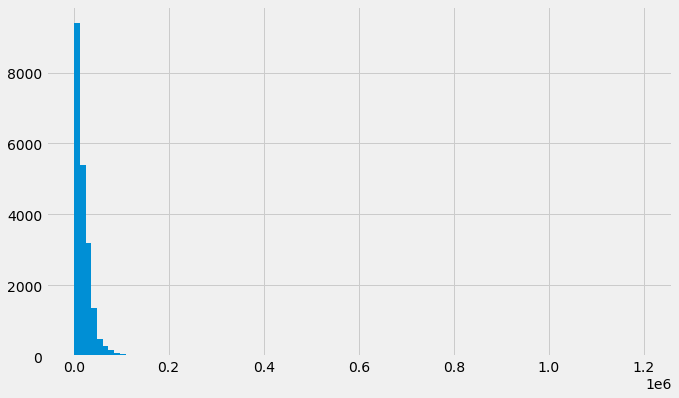

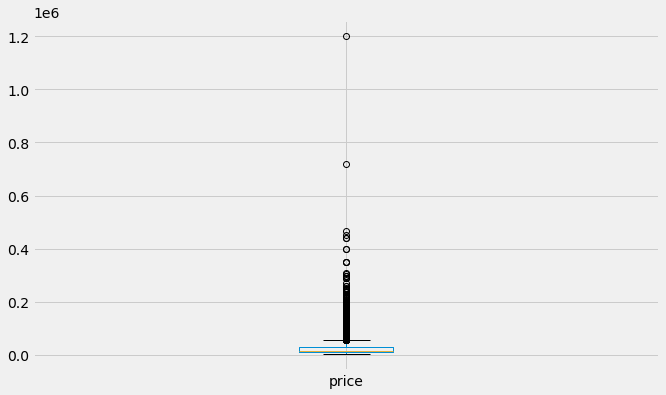

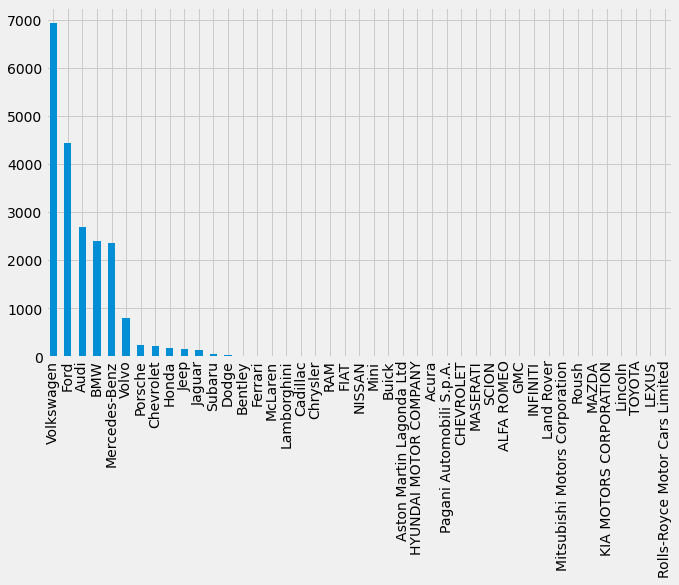

In [6]:
init_task3()